In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.patheffects as pe
from matplotlib.ticker import FormatStrFormatter
import math
from adjustText import adjust_text
from highlight_text import fig_text
import matplotlib.ticker as mtick

In [2]:
df = pd.read_csv('shots.csv')
df

,Rk,Player,Nation,Pos,Squad,Comp,Age,Born,90s,Gls,...,GperSoT,Dist,FK,PK,PKatt,xG,npxG,npxGperSh,G-xG,np:G-xG
0,1,Myron Boadu\5b479568,nl NED,FW,Monaco,fr Ligue 1,20,2001,10.7,4,...,0.50,9.8,0,0,0,6.7,6.7,0.32,-2.7,-2.7
1,2,Frenkie de Jong\1bacc518,nl NED,MF,Barcelona,es La Liga,24,1997,27.5,3,...,0.43,13.8,0,0,0,4.5,4.5,0.26,-1.5,-1.5
2,3,Lucas Alario\834d0be5,ar ARG,FW,Leverkusen,de Bundesliga,28,1992,7.3,6,...,0.46,11.2,0,0,1,6.5,5.8,0.25,-0.5,0.2
3,4,Yeremi Pino\540ec57b,es ESP,MFFW,Villarreal,es La Liga,18,2002,18.6,6,...,0.40,11.4,0,0,0,6.2,6.2,0.24,-0.2,-0.2
4,5,Raheem Sterling\b400bde0,eng ENG,FW,Manchester City,eng Premier League,26,1994,23.6,13,...,0.44,13.8,0,2,3,14.4,12.0,0.22,-1.4,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1009,1010,Walace\26db8853,br BRA,MF,Udinese,it Serie A,26,1995,33.0,1,...,0.09,24.2,0,0,0,1.4,1.4,0.03,-0.4,-0.4
1010,1011,Oier Zarraga\968a1c2f,es ESP,MF,Athletic Club,es La Liga,22,1999,13.0,1,...,0.00,24.0,0,1,1,1.3,0.5,0.03,-0.3,-0.5
1011,1012,Fran Beltrán\ed5c5fa3,es ESP,MF,Celta Vigo,es La Liga,22,1999,28.9,1,...,0.25,27.6,0,0,0,0.4,0.4,0.02,0.6,0.6
1012,1013,Domenico Criscito\35dd6d80,it ITA,DF,Genoa,it Serie A,34,1986,18.0,6,...,NaN,31.4,0,6,7,5.6,0.3,0.02,0.4,-0.3


In [3]:
df['Player'] = df['Player'].str.split('\\', expand=True)[0]
df = df[(df['Pos'] == 'FW') | (df['Pos'] == 'MFFW')]
df.head(10)

,Rk,Player,Nation,Pos,Squad,Comp,Age,Born,90s,Gls,...,GperSoT,Dist,FK,PK,PKatt,xG,npxG,npxGperSh,G-xG,np:G-xG
0,1,Myron Boadu,nl NED,FW,Monaco,fr Ligue 1,20,2001,10.7,4,...,0.50,9.8,0,0,0,6.7,6.7,0.32,-2.7,-2.7
2,3,Lucas Alario,ar ARG,FW,Leverkusen,de Bundesliga,28,1992,7.3,6,...,0.46,11.2,0,0,1,6.5,5.8,0.25,-0.5,0.2
3,4,Yeremi Pino,es ESP,MFFW,Villarreal,es La Liga,18,2002,18.6,6,...,0.40,11.4,0,0,0,6.2,6.2,0.24,-0.2,-0.2
4,5,Raheem Sterling,eng ENG,FW,Manchester City,eng Premier League,26,1994,23.6,13,...,0.44,13.8,0,2,3,14.4,12.0,0.22,-1.4,-1.0
5,6,Juanmi,es ESP,FW,Betis,es La Liga,28,1993,23.7,16,...,0.53,13.5,0,0,0,11.8,11.8,0.21,4.2,4.2
7,8,Marco Reus,de GER,MFFW,Dortmund,de Bundesliga,32,1989,27.8,9,...,0.41,15.4,6,0,0,10.8,10.8,0.21,-1.8,-1.8
8,9,Roberto Soldado,es ESP,FW,Levante,es La Liga,36,1985,7.4,3,...,0.38,11.8,0,0,0,3.5,3.5,0.21,-0.5,-0.5
9,10,Tammy Abraham,eng ENG,FW,Roma,it Serie A,23,1997,34.3,17,...,0.44,12.2,2,3,3,20.5,18.3,0.20,-3.5,-4.3
10,11,Paco Alcácer,es ESP,FW,Villarreal,es La Liga,27,1993,8.7,1,...,0.13,13.0,1,0,0,3.7,3.7,0.20,-2.7,-2.7
11,12,Patrick Bamford,eng ENG,FW,Leeds United,eng Premier League,27,1993,6.2,2,...,0.40,13.6,0,0,0,3.9,3.9,0.20,-1.9,-1.9


In [4]:
df2 = df[['Player','Pos','90s','Gls','npxGperSh','np:G-xG', 'Squad']].copy()
df2 = df2[(df['90s'] > 10)]
df2.head(10)

,Player,Pos,90s,Gls,npxGperSh,np:G-xG,Squad
0,Myron Boadu,FW,10.7,4,0.32,-2.7,Monaco
3,Yeremi Pino,MFFW,18.6,6,0.24,-0.2,Villarreal
4,Raheem Sterling,FW,23.6,13,0.22,-1.0,Manchester City
5,Juanmi,FW,23.7,16,0.21,4.2,Betis
7,Marco Reus,MFFW,27.8,9,0.21,-1.8,Dortmund
9,Tammy Abraham,FW,34.3,17,0.20,-4.3,Roma
12,Mario Pašalić,MFFW,22.2,13,0.20,3.3,Atalanta
13,Pierre-Emerick Aubameyang,FW,12.0,11,0.19,3.9,Barcelona
14,Taiwo Awoniyi,FW,24.2,15,0.19,0.6,Union Berlin
15,Mohamed Bayo,FW,26.8,14,0.19,0.4,Clermont Foot


In [5]:
df2 = df2.rename(columns={'npxGperSh': 'NpxGperSh', 'np:G-xG': 'Performance'})
df2.head(5)

,Player,Pos,90s,Gls,NpxGperSh,Performance,Squad
0,Myron Boadu,FW,10.7,4,0.32,-2.7,Monaco
3,Yeremi Pino,MFFW,18.6,6,0.24,-0.2,Villarreal
4,Raheem Sterling,FW,23.6,13,0.22,-1.0,Manchester City
5,Juanmi,FW,23.7,16,0.21,4.2,Betis
7,Marco Reus,MFFW,27.8,9,0.21,-1.8,Dortmund


In [6]:
df3 = df2.loc[df2['Squad'] == "Manchester City"]
df4 = df2.loc[df2['Squad'] != "Manchester City"]

In [7]:
df3.head(10)

,Player,Pos,90s,Gls,NpxGperSh,Performance,Squad
4,Raheem Sterling,FW,23.6,13,0.22,-1.0,Manchester City
95,Phil Foden,FW,23.6,9,0.16,-0.1,Manchester City
122,Gabriel Jesus,FW,20.9,8,0.15,-2.4,Manchester City
180,Bernardo Silva,MFFW,31.7,8,0.14,1.2,Manchester City
341,Jack Grealish,FW,21.3,3,0.11,-1.8,Manchester City
361,Riyad Mahrez,FW,16.6,11,0.11,0.7,Manchester City


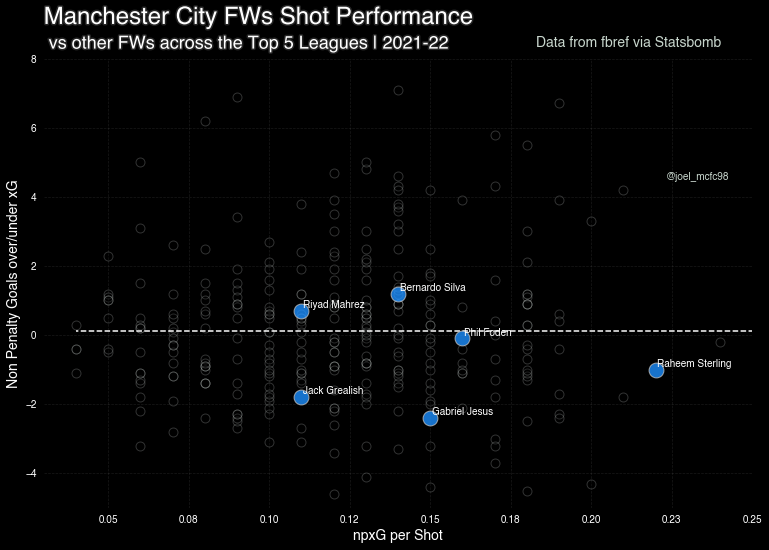

In [8]:
with plt.style.context("dark_background"):
    line_color = "silver"
    marker_color = "dodgerblue"
    plt.rcParams['font.family'] = 'Helvetica' ##set global font
    fig, ax = plt.subplots(figsize=(12, 8))
    
    ax.grid(linestyle="dashed", lw=0.7, alpha=0.1, zorder=1) ## a faint grid
    for spine in ["top", "right", "left", "bottom"]:
        ax.spines[spine].set_visible(False)  
        ax.set_position([0.08, 0.08, 0.82, 0.78]) ## make space for the title on top of the axes
    
    
    ax.scatter( df3["NpxGperSh"],df3["Performance"], s=220, zorder=10, 
                           ec=line_color, fc=marker_color, alpha=0.8) ##scatter points

    ax.scatter( df4["NpxGperSh"],df4["Performance"],
                            zorder = 2,fc='black', ec='mintcream', s = 80, alpha = .2) ##scatter points
    
    texts = [] ##plot player names
    for row in df3.itertuples():
        if row.Squad == 'Manchester City':
            texts.append(ax.text( row.NpxGperSh	, row.Performance, row.Player, fontsize=10, ha='center', fontweight='bold',  va='center', zorder=10))
    adjust_text(texts) ## to remove overlaps between labels
   
    ax.set(xlabel="npxG per Shot", ylabel="Non Penalty Goals over/under xG", ylim=(-5, 8), xlim=(0.03, 0.25)) ## set labels and limits


    x = np.array(df4.NpxGperSh)
    y = np.array(df4.Performance)
    y_avg = [np.mean(x)] * len(x)
    ax.plot(x, y_avg, color='white',  ls='--', label="average plot")

    plt.tick_params(left = False, bottom = False)
    ax.xaxis.set_major_formatter(FormatStrFormatter('%.2f'))
    
    ax.xaxis.label.set(fontsize=14, fontweight='bold')
    ax.yaxis.label.set(fontsize=14, fontweight='bold') ## increase the weight of the axis labels

    ax.set_position([0.08, 0.08, 0.82, 0.78]) ## make space for the title on top of the axes

    
    fig_text(s=f'Data from fbref via Statsbomb',
        x=.65, y =.9, fontsize=14,color='#c7d5cc')

    fig.text(.8,.65,f'@joel_mcfc98', fontstyle='italic',fontsize=10,color='#c7d5cc')
    
    fig.text(x=0.08, y=0.92, s="Manchester City FWs Shot Performance", 
            ha='left', fontsize=24, fontweight='bold', 
            path_effects=[pe.Stroke(linewidth=3, foreground='0.15'),
                       pe.Normal()])   
    
    fig_text(x=0.08, y=0.90, ha='left',
             fontsize=18, fontweight='bold',
             s=' vs other FWs across the Top 5 Leagues | 2021-22',
             path_effects=[pe.Stroke(linewidth=3, foreground='0.15'),
                       pe.Normal()])

fig.savefig("mancity-shot-performance", dpi=180)   

In [78]:
df5 = df2.loc[df2['Squad'] == "Chelsea"]
df6 = df2.loc[df2['Squad'] != "Chelsea"]

In [79]:
df5.head(10)

,Player,Pos,90s,Gls,NpxGperSh,Performance,Squad
54,Christian Pulisic,MFFW,14.3,6,0.18,0.9,Chelsea
163,Romelu Lukaku,FW,17.7,8,0.14,0.9,Chelsea
370,Mason Mount,MFFW,26.3,11,0.11,1.9,Chelsea


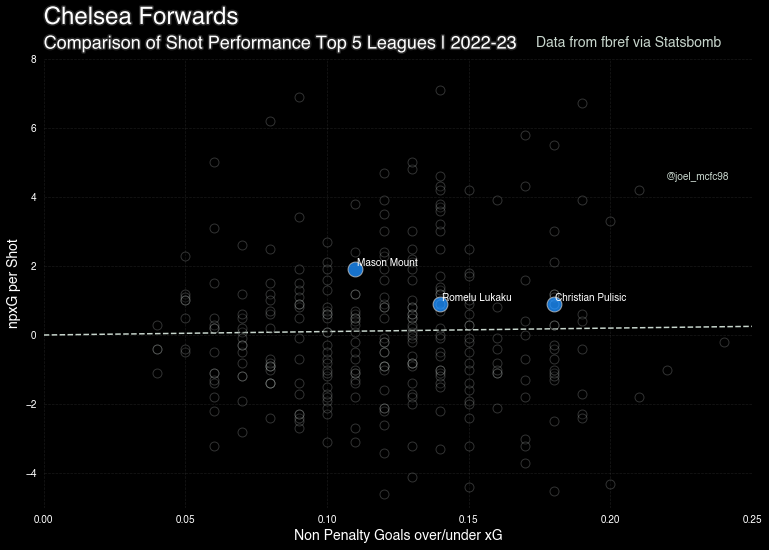

In [81]:
with plt.style.context("dark_background"):
    line_color = "silver"
    marker_color = "dodgerblue"
    plt.rcParams['font.family'] = 'Helvetica' ##set global font
    fig, ax = plt.subplots(figsize=(12, 8))
    
    ax.grid(linestyle="dashed", lw=0.7, alpha=0.1, zorder=1) ## a faint grid
    for spine in ["top", "right", "left", "bottom"]:
        ax.spines[spine].set_visible(False)  
        ax.set_position([0.08, 0.08, 0.82, 0.78]) ## make space for the title on top of the axes
    
    
    ax.scatter( df5["NpxGperSh"],df5["Performance"], s=220, zorder=10, 
                           ec=line_color, fc=marker_color, alpha=0.8) ##scatter points

    ax.scatter( df6["NpxGperSh"],df6["Performance"],
                            zorder = 2,fc='black', ec='mintcream', s = 80, alpha = .2) ##scatter points
    
    texts = [] ##plot player names
    for row in df5.itertuples():
        if row.Squad == 'Chelsea':
            texts.append(ax.text( row.NpxGperSh	, row.Performance, row.Player, fontsize=10, ha='center', fontweight='bold',  va='center', zorder=10))
    adjust_text(texts) ## to remove overlaps between labels
   
    ax.set(xlabel="Non Penalty Goals over/under xG", ylabel="npxG per Shot", ylim=(-5, 8), xlim=(0, 0.25)) ## set labels and limits


    # The dashed-line
    ax.plot(
            [0,math.ceil(limit_)],
            [0,math.ceil(limit_)], 
            ls = "--", 
            marker = "None", 
#             lw = 0.75, 
            color = "#c7d5cc",
            zorder = 1
        )

    plt.tick_params(left = False, bottom = False)
    
    ax.xaxis.label.set(fontsize=14, fontweight='bold')
    ax.yaxis.label.set(fontsize=14, fontweight='bold') ## increase the weight of the axis labels

    ax.set_position([0.08, 0.08, 0.82, 0.78]) ## make space for the title on top of the axes

    
    fig_text(s=f'Data from fbref via Statsbomb',
        x=.65, y =.9, fontsize=14,color='#c7d5cc')

    fig.text(.8,.65,f'@joel_mcfc98', fontstyle='italic',fontsize=10,color='#c7d5cc')
    
    fig.text(x=0.08, y=0.92, s="Chelsea Forwards", 
            ha='left', fontsize=24, fontweight='bold', 
            path_effects=[pe.Stroke(linewidth=3, foreground='0.15'),
                       pe.Normal()])   
    
    fig_text(x=0.08, y=0.90, ha='left',
             fontsize=18, fontweight='bold',
             s='Comparison of Shot Performance Top 5 Leagues | 2022-23',
             path_effects=[pe.Stroke(linewidth=3, foreground='0.15'),
                       pe.Normal()])

fig.savefig("chelsea-shot-performance", dpi=180)   